In [438]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Series, DataFrame, Panel
from sklearn import preprocessing
pd.set_option('display.max_rows',15)
import tensorflow as tf

## Neural Network Model

In [439]:
# --------------------------- Load Data ----------------------------------

In [440]:
bitcoin = pd.read_csv ('./bitcoin_price.csv', parse_dates = True, index_col = [0])

In [441]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2018-02-20,11231.80,11958.50,11231.80,11403.70,"9,926,540,000","189,536,000,000"
2018-02-19,10552.60,11273.80,10513.20,11225.30,"7,652,090,000","178,055,000,000"
2018-02-18,11123.40,11349.80,10326.00,10551.80,"8,744,010,000","187,663,000,000"
2018-02-17,10207.50,11139.50,10149.40,11112.70,"8,660,880,000","172,191,000,000"
2018-02-16,10135.70,10324.10,9824.82,10233.90,"7,296,160,000","170,960,000,000"
2018-02-15,9488.32,10234.80,9395.58,10166.40,"9,062,540,000","160,025,000,000"
2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"
...,...,...,...,...,...,...
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"


In [442]:
bitcoin = bitcoin.sort_index(ascending = True)

In [443]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,-,"1,500,520,000"
2013-04-29,134.44,147.49,134.00,144.54,-,"1,491,160,000"
2013-04-30,144.00,146.93,134.05,139.00,-,"1,597,780,000"
2013-05-01,139.00,139.89,107.72,116.99,-,"1,542,820,000"
2013-05-02,116.38,125.60,92.28,105.21,-,"1,292,190,000"
2013-05-03,106.25,108.13,79.10,97.75,-,"1,180,070,000"
2013-05-04,98.10,115.00,92.50,112.50,-,"1,089,890,000"
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,"7,909,820,000","145,023,000,000"


In [444]:
# -------------------------- Deal with missing values ---------------------------

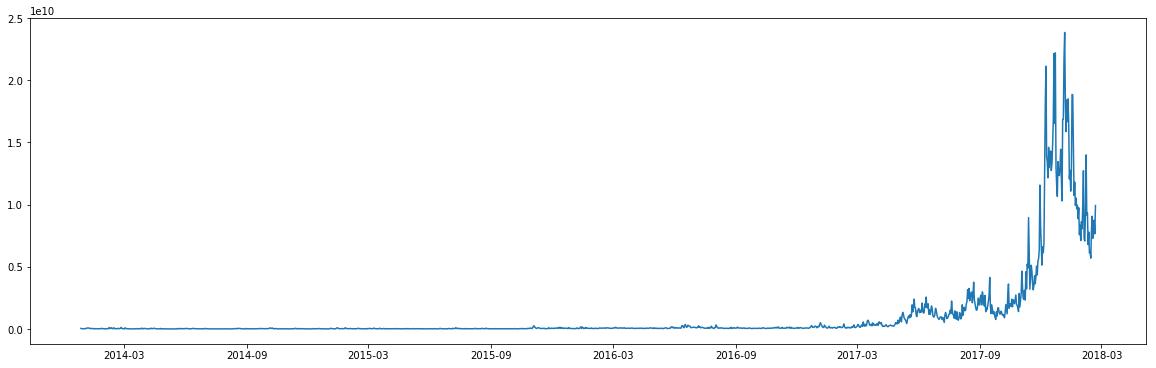

In [445]:
bitcoin_vol = bitcoin['Volume']
# remove the comma (,) in volume value string
bitcoin_vol_1 = bitcoin_vol[bitcoin_vol != "-"]
bitcoin_vol_1 = bitcoin_vol_1.apply(lambda x: float(x.replace(',', '')))

plt.figure(figsize = (20, 6))
plt.plot(bitcoin_vol_1)
plt.show()

In [446]:
# use the mean value between 2014-01 to 2014-09 to replace the missing value
bitcoin_vol_2014 = pd.DataFrame(bitcoin_vol_1).loc['2014-01-01': '2014-10-01']
bitcoin_vol_2014_mean = bitcoin_vol_2014['Volume'].mean()
print(bitcoin_vol_2014_mean)
bitcoin_vol_2 = bitcoin_vol[bitcoin_vol == "-"]
bitcoin_vol_2 = bitcoin_vol_2.apply(lambda x: float(x.replace('-', '%f' % (bitcoin_vol_2014_mean))))
# update dataset
bitcoin_vol.update(bitcoin_vol_1)
bitcoin_vol.update(bitcoin_vol_2)
bitcoin_vol

25801388.321167883


Date
2013-04-28    2.58014e+07
2013-04-29    2.58014e+07
2013-04-30    2.58014e+07
2013-05-01    2.58014e+07
2013-05-02    2.58014e+07
2013-05-03    2.58014e+07
2013-05-04    2.58014e+07
                 ...     
2018-02-14    7.90982e+09
2018-02-15    9.06254e+09
2018-02-16    7.29616e+09
2018-02-17    8.66088e+09
2018-02-18    8.74401e+09
2018-02-19    7.65209e+09
2018-02-20    9.92654e+09
Name: Volume, Length: 1760, dtype: object

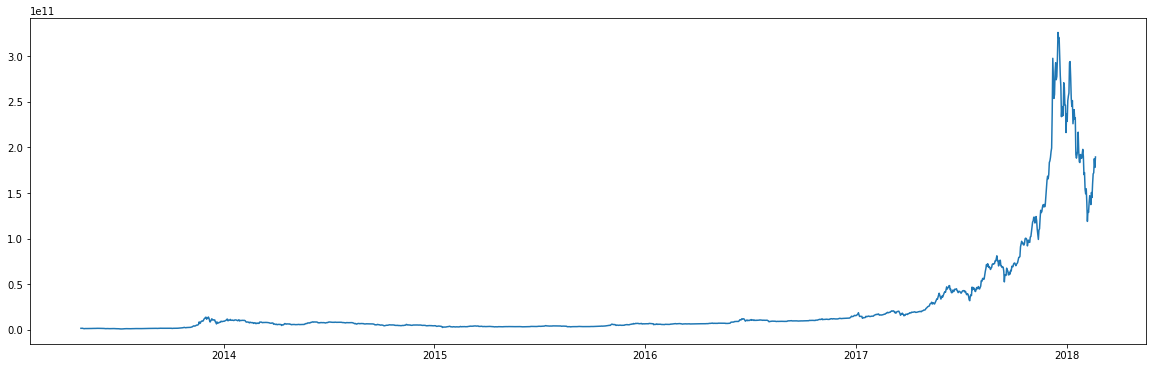

In [447]:
# remove the comma (,) in market cap value string
bitcoin_mc = bitcoin['Market Cap']
bitcoin_mc = bitcoin_mc.apply(lambda x: float(x.replace(',', '')))

plt.figure(figsize = (20, 6))
plt.plot(bitcoin_mc)
plt.show()

In [448]:
# update datasets
bitcoin['Volume'].update(bitcoin_vol)
bitcoin['Market Cap'].update(bitcoin_mc)

In [449]:
bitcoin

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2013-04-28,135.30,135.98,132.10,134.21,2.58014e+07,1.50052e+09
2013-04-29,134.44,147.49,134.00,144.54,2.58014e+07,1.49116e+09
2013-04-30,144.00,146.93,134.05,139.00,2.58014e+07,1.59778e+09
2013-05-01,139.00,139.89,107.72,116.99,2.58014e+07,1.54282e+09
2013-05-02,116.38,125.60,92.28,105.21,2.58014e+07,1.29219e+09
2013-05-03,106.25,108.13,79.10,97.75,2.58014e+07,1.18007e+09
2013-05-04,98.10,115.00,92.50,112.50,2.58014e+07,1.08989e+09
...,...,...,...,...,...,...
2018-02-14,8599.92,9518.54,8599.92,9494.63,7.90982e+09,1.45023e+11


In [450]:
# ------------------------------ Build Neural Network ----------------------------

In [451]:
# scale dataset
scaler = preprocessing.MinMaxScaler()
scaler.fit(bitcoin)
bitcoin = scaler.transform(bitcoin)

In [452]:
bitcoin

array([[0.003442  , 0.00306878, 0.00352063, 0.00338567, 0.00096248,
        0.00221681],
       [0.00339769, 0.00364387, 0.00362111, 0.00391735, 0.00096248,
        0.00218804],
       [0.00389029, 0.00361589, 0.00362375, 0.0036322 , 0.00096248,
        0.00251574],
       ...,
       [0.56962586, 0.56335526, 0.54263596, 0.53957415, 0.36668918,
        0.57438758],
       [0.54021425, 0.559558  , 0.55253623, 0.57423888, 0.32088341,
        0.54485737],
       [0.57521139, 0.5937683 , 0.59054016, 0.58342105, 0.41629602,
        0.58014425]])

In [453]:
# split data into training set and testing set
split = int(0.9 * bitcoin.shape[0])
train_data = bitcoin[0 : split]
test_data = bitcoin[split :]

In [454]:
print(train_data.shape, test_data.shape)

(1584, 6) (176, 6)


In [455]:
# use Open, Volume, Market Cap in training data as input training matrix (1584 x 3)
x_train = train_data[:, [0, 4, 5]]
# use Close in training data as output training matrix (1584 x 1)
y_train = train_data[:, 3]

# use Open, Volume, Market Cap in testing data as input testing matrix (1584 x 3)
x_test = test_data[:, [0, 4, 5]]
y_test = test_data[:, 3]

In [456]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(1584, 3) (1584,) (176, 3) (176,)


In [457]:
# set the number of input dataset
n_dataset = x_train.shape[1]

# set the number of neurons in each layer
n_neurons_1 = 8
n_neurons_2 = 4
n_neurons_3 = 2
n_target = 1

In [458]:
# Session
net = tf.InteractiveSession()

/home/sunny/.conda/envs/py3env/lib/python3.6/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [459]:
# define the input and output placeholder for neural network
# The None argument indicates that at this point we do not yet know the number of 
# observations that flow through the neural net graph in each batch
X = tf.placeholder(dtype = tf.float32, name = "X", shape = [None, 3])
Y = tf.placeholder(dtype = tf.float32, name = "Y", shape = [None])

In [460]:
# define initializers
sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode = "fan_avg", distribution = "uniform", scale = sigma)
bias_initializer = tf.zeros_initializer()

In [461]:
# model architecture parameter
# hidden weights + bias

# Layer 1: Variables for hidden weights and biases
w_hidden_1 = tf.Variable(weight_initializer([n_dataset, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))

# Layer 2: Varibales for hidden weights and biases
w_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))

# Layer 3: Variables for hidden weights and biases
w_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))

# Output Layer: Variable for hidden weights and biases
w_out = tf.Variable(weight_initializer([n_neurons_3, n_target]))
bias_out = tf.Variable(bias_initializer([n_target]))

In [462]:
w_out

<tf.Variable 'Variable_110:0' shape=(2, 1) dtype=float32_ref>

In [463]:
# Activation function for hidden layers (ReLU)

# activation function for hidden layer 1
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, w_hidden_1), bias_hidden_1))

# activation function for hidden layer 2
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, w_hidden_2), bias_hidden_2))

# activation function for hidden layer 3
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, w_hidden_3), bias_hidden_3))

# output layer
out = tf.transpose(tf.add(tf.matmul(hidden_3, w_out), bias_out))

In [464]:
out

<tf.Tensor 'transpose_12:0' shape=(1, ?) dtype=float32>

In [465]:
# define cost function
mse = tf.reduce_mean(tf.squared_difference(out, Y))

In [466]:
# define optimizer
opt = tf.train.AdamOptimizer().minimize(mse)

In [467]:
# initialize all variables 
net.run(tf.global_variables_initializer())

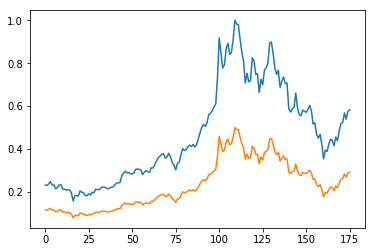

In [468]:
# set up plot
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()

In [469]:
len(y_train)

1584

In [470]:
# fit neural net
batch_size = 15
epochs = 10

mse_train = []
mse_test = []

for e in range(epochs):
    
    # shuffle data first
    shuffle_indices = np.random.permutation(np.arange(0,len(y_train)))
    x_train = x_train[shuffle_indices]
    y_train = y_train[shuffle_indices]
    
    # mini-batch training
    for i in range(len(y_train) // batch_size):
        start = i * batch_size
        batch_x = x_train[start: start + batch_size]
        batch_y = y_train[start: start + batch_size]
        
        # Run optimizer with batch
        net.run(opt, feed_dict = {X: batch_x, Y: batch_y})
        
        # show progress
        if np.mod(i, 50) == 0:
            
            # MSE train and test
            mse_train.append(net.run(mse, feed_dict = {X: batch_x, Y: batch_y}))
            mse_test.append(net.run(mse, feed_dict = {X: x_test, Y: y_test}))
            
            # prediction
        pred = net.run(out, feed_dict = {X: x_test})
            

In [471]:
pred

array([[0.22605883, 0.23452471, 0.23379928, 0.2383084 , 0.24571069,
        0.23534046, 0.23313096, 0.21826644, 0.22509947, 0.23547854,
        0.2344297 , 0.21657485, 0.216974  , 0.21137358, 0.2141807 ,
        0.21281292, 0.20045154, 0.1635823 , 0.18712057, 0.1847213 ,
        0.18494333, 0.2090195 , 0.2007885 , 0.2000481 , 0.18582347,
        0.18927899, 0.20099793, 0.18883772, 0.20413208, 0.2000686 ,
        0.21562432, 0.21385704, 0.21488135, 0.2246134 , 0.22541735,
        0.22715719, 0.22484708, 0.21918419, 0.2258688 , 0.23088643,
        0.22799635, 0.23703222, 0.24422707, 0.24726593, 0.24332155,
        0.26580438, 0.27786133, 0.28431922, 0.2785208 , 0.28109488,
        0.27433524, 0.2751253 , 0.27851507, 0.2900712 , 0.2920627 ,
        0.28997555, 0.2864299 , 0.2724724 , 0.2812905 , 0.28807357,
        0.2862862 , 0.27918825, 0.29626223, 0.2952103 , 0.30578628,
        0.31054246, 0.3296063 , 0.3348219 , 0.34439462, 0.34252858,
        0.3297933 , 0.3259568 , 0.34398884, 0.32

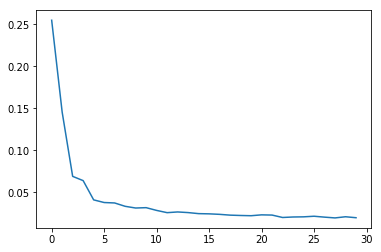

In [472]:
# plot the learning curve 
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(mse_test)

(176,)
(176,)


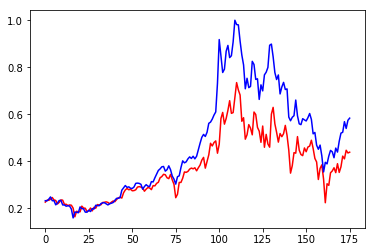

In [473]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
y1 = pred[0]
y2 = y_test

print(y1.shape)
print(y2.shape)
ax1.plot(y1, c = "r")
ax1.plot(y2, c = "b")

## Recurrent Neural Network Model

In [475]:
# import relevant Keras modules
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [476]:
bitcoin

array([[0.003442  , 0.00306878, 0.00352063, 0.00338567, 0.00096248,
        0.00221681],
       [0.00339769, 0.00364387, 0.00362111, 0.00391735, 0.00096248,
        0.00218804],
       [0.00389029, 0.00361589, 0.00362375, 0.0036322 , 0.00096248,
        0.00251574],
       ...,
       [0.56962586, 0.56335526, 0.54263596, 0.53957415, 0.36668918,
        0.57438758],
       [0.54021425, 0.559558  , 0.55253623, 0.57423888, 0.32088341,
        0.54485737],
       [0.57521139, 0.5937683 , 0.59054016, 0.58342105, 0.41629602,
        0.58014425]])